# 导包

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from google.colab import drive
from matplotlib import pyplot as plt

# 定义画图函数

In [2]:
def plt_svm(model, name):
  plt.figure() # 创建新图像
  xp, xn = x[y==1], x[y==0] # 划分正负样本
  plt.scatter(xp[:,0], xp[:,1], c='green', label='1') # 画出正样本
  plt.scatter(xn[:,0], xn[:,1], c='blue', label='0') # 画出负样本
  # 画出支持向量
  plt.scatter(model.support_vectors_[:,0], 
              model.support_vectors_[:,1], 
              c='none', marker='o', edgecolors='r', s=150,
              label='support_vectors') 
  
  # 画出边界
  ax = plt.subplot()
  x_tmp = np.linspace(0.2, 0.8, 600)
  y_tmp = np.linspace(0, 0.5, 500)

  X_tmp, Y_tmp = np.meshgrid(x_tmp, y_tmp)
  Z_tmp = model.predict(np.c_[X_tmp.ravel(), Y_tmp.ravel()]).reshape(X_tmp.shape)
  cs = ax.contour(X_tmp, Y_tmp, Z_tmp, [0], colors='orange', linewidths=1)
  ax.clabel(cs, fmt={cs.levels[0]: 'decision boundary'})
  
  plt.title(name)
  plt.legend()
  plt.show()

# 加载数据

In [3]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/data/tmp/watermelon3.csv')
print(df)

Mounted at /content/drive
       密度    含糖率  好瓜
0   0.697  0.460   1
1   0.774  0.376   1
2   0.634  0.264   1
3   0.608  0.318   1
4   0.556  0.215   1
5   0.403  0.237   1
6   0.481  0.149   1
7   0.437  0.211   1
8   0.666  0.091   0
9   0.243  0.267   0
10  0.245  0.057   0
11  0.343  0.099   0
12  0.639  0.161   0
13  0.657  0.198   0
14  0.360  0.370   0
15  0.593  0.042   0
16  0.719  0.103   0


# 处理数据

In [4]:
x = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values
print(x)
print(y)

[[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]
 [0.666 0.091]
 [0.243 0.267]
 [0.245 0.057]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.593 0.042]
 [0.719 0.103]]
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


# c=10 时线性核

In [5]:
svm_linear = svm.SVC(C=10, kernel='linear')
svm_linear.fit(x, y)
print('c=10 时线性核 SVM 的支持向量：%d 个\n' % len(svm_linear.support_vectors_),
      svm_linear.support_vectors_)

c=10 时线性核 SVM 的支持向量：15 个
 [[0.666 0.091]
 [0.243 0.267]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.593 0.042]
 [0.719 0.103]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


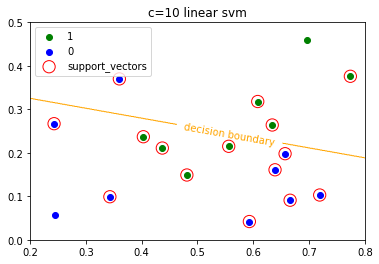

In [6]:
plt_svm(svm_linear, 'c=10 linear svm')

# c=100 时线性核

In [7]:
svm_linear_pro = svm.SVC(C=100,kernel='linear')
svm_linear_pro.fit(x, y)
print('c=100 时线性核 SVM 的支持向量：%d 个\n' % len(svm_linear_pro.support_vectors_),
      svm_linear_pro.support_vectors_)

c=100 时线性核 SVM 的支持向量：13 个
 [[0.666 0.091]
 [0.243 0.267]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.719 0.103]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


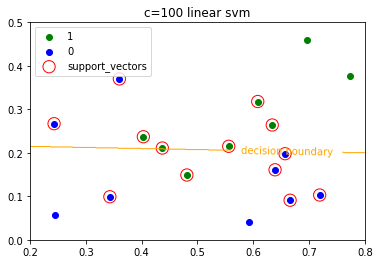

In [8]:
plt_svm(svm_linear_pro, 'c=100 linear svm')

# c = 1 时高斯核

In [9]:
svm_rbf = svm.SVC(C=1,kernel='rbf')
svm_rbf.fit(x, y)
print('c=1 时高斯核 SVM 的支持向量：%d 个\n' % len(svm_rbf.support_vectors_), 
      svm_rbf.support_vectors_)

c=1 时高斯核 SVM 的支持向量：17 个
 [[0.666 0.091]
 [0.243 0.267]
 [0.245 0.057]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.593 0.042]
 [0.719 0.103]
 [0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


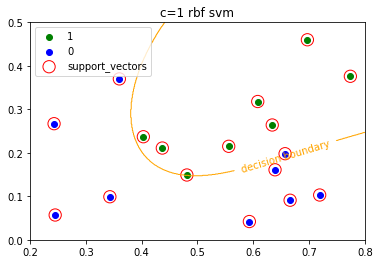

In [10]:
plt_svm(svm_rbf, 'c=1 rbf svm')

# c = 100 时高斯核

In [11]:
svm_rbf_pro = svm.SVC(C=100,kernel='rbf')
svm_rbf_pro.fit(x, y)
print('c=100 时线性核 SVM 的支持向量：%d 个\n' % len(svm_rbf_pro.support_vectors_), 
      svm_rbf_pro.support_vectors_)

c=100 时线性核 SVM 的支持向量：7 个
 [[0.343 0.099]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.403 0.237]
 [0.481 0.149]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


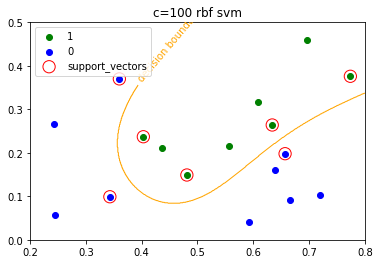

In [12]:
plt_svm(svm_rbf_pro, 'c=100 rbf svm')